# Capstone Peoject- The Battle of Neighbors 

## Introduction 

My client is planning to open a new Pizza Restaturant in New York. However, my client is uncertain about the location.Yhus, clientwants to know that comparing to Queens, **is Manhattan the best place to open a new Pizza Restaurant?** In addition, the busisness owner doesn't want to open a restaurant that is close to it's competetors. Insdead, the busines owner wants to open the restaurant near bars. 

As business and Data Anlytist for my client my tasks are:

1. Find locations with the least number of pizza restaurant 
2. Among the locations we find above, select the one with the most number of bars 

## Data 

[New York Neighborhood](https://geo.nyu.edu/catalog/nyu_2451_34572)
Will use the data to analyze the Neigborhood of Manhatton, Queens, and Brooklyn.

### Download Data and Explore Dataset 

In [3]:
import pandas as pd
import numpy as np
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim #covert address to lat and lot values 
import requests #handel requests
import matplotlib.cm as cm
import matplotlib.colors as colors 
from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Done')

Done


In [5]:
import json
from pandas.io.json import json_normalize
print('Done')

Done


In [6]:
with open ('newyork_data.json') as ny_data:
    newyork_data = json.load(ny_data)

In [7]:
#newyork_data

In [8]:
nb_data=newyork_data['features']

In [9]:
nb_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
column_names =['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighbors =pd.DataFrame(columns =column_names)
neighbors


,Borough,Neighborhood,Latitude,Longitude


In [11]:
for data in nb_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighbors = neighbors.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
neighbors.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


#### Manhattan Data

In [13]:
man = neighbors[neighbors['Borough'] == 'Manhattan'].reset_index(drop=True)
man.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
address = 'Manhattan'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [15]:
CLIENT_ID = '32ZO5WWBYFCG3GBPVF0CBCG5P2ILDUJ1BNFOSILFGX51W2KU' # your Foursquare ID
CLIENT_SECRET = 'DLI1WNKOGLEXRKXY322Z4GPSQIVKFUMD2EH3DPLNYUJIH4XX' # your Foursquare Secret
VERSION = '20200721'

In [16]:
man.loc[0, 'Neighborhood']

'Marble Hill'

#### Queens

In [17]:
q = neighbors[neighbors['Borough'] == 'Queens'].reset_index(drop=True)
q.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [18]:
address = 'Queens'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [19]:
q.loc[0, 'Neighborhood']

'Astoria'

#### Brooklyn

In [20]:
b = neighbors[neighbors['Borough'] == 'Brooklyn'].reset_index(drop=True)
b.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [21]:
address = 'Brooklyn'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brookln are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brookln are 40.6501038, -73.9495823.


In [22]:
b.loc[10, 'Neighborhood']

'East Flatbush'

### Manhattan's Neighborhood Latitude and Longitude Values 

In [23]:
neighborhood_latitude1=man.loc[0, 'Latitude']
neighborhood_longitude1=man.loc[0,'Longitude']
neighborhood_name1 =man.loc[0, 'Neighborhood']
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name1, 
                                                               neighborhood_latitude1, 
                                                               neighborhood_longitude1))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [24]:
radius =1000
LIMIT =100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude1, 
    neighborhood_longitude1, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=32ZO5WWBYFCG3GBPVF0CBCG5P2ILDUJ1BNFOSILFGX51W2KU&client_secret=DLI1WNKOGLEXRKXY322Z4GPSQIVKFUMD2EH3DPLNYUJIH4XX&v=20200721&ll=40.87655077879964,-73.91065965862981&radius=1000&limit=100'

## Methodology 

Based on the requirement from our client, the store owner doesn't want to have many competitors. So we are going to see which area has the least number of pizza shops. In addition, the owner wants to have more bars and pubs near the shop. So we will check that as secondary priority.

In [25]:
results =requests.get(url).json()

Foursquare

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
venues1 = results['response']['groups'][0]['items']
nearby_venues1 = json_normalize(venues1)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]
#filter the category for each row 
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)
#clean the columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [28]:
nearby_venues1.head()

,name,categories,lat,lng
0,Bikram Yoga,Yoga Studio,40.876844,-73.906204
1,Arturo's,Pizza Place,40.874412,-73.910271
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Sam's Pizza,Pizza Place,40.879435,-73.905859
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [29]:
#details of the data 
x =nearby_venues1.categories

In [30]:
from collections import Counter

In [31]:
x1=Counter(x)
x2=dict(x1)
x2

{'Yoga Studio': 1,
 'Pizza Place': 5,
 'Diner': 1,
 'Coffee Shop': 2,
 'Pub': 1,
 'Mexican Restaurant': 4,
 'Athletics & Sports': 1,
 'Sandwich Place': 2,
 'Gym': 2,
 'Supermarket': 3,
 'Café': 3,
 'Caribbean Restaurant': 1,
 'Donut Shop': 3,
 'Gourmet Shop': 1,
 'Tennis Stadium': 1,
 'Scenic Lookout': 2,
 'Department Store': 1,
 'Seafood Restaurant': 1,
 'Bakery': 2,
 'Deli / Bodega': 1,
 'Spanish Restaurant': 3,
 'Pharmacy': 3,
 'Discount Store': 1,
 'Park': 6,
 'Supplement Shop': 1,
 'Lounge': 1,
 'American Restaurant': 1,
 'Miscellaneous Shop': 1,
 'Playground': 1,
 'Wine Shop': 1,
 'Candy Store': 1,
 'Ice Cream Shop': 1,
 'Cuban Restaurant': 1,
 'Steakhouse': 1,
 'Thai Restaurant': 1,
 'Video Game Store': 1,
 'Bar': 1,
 'Kids Store': 1,
 'Chinese Restaurant': 1,
 'Shopping Mall': 1,
 'Big Box Store': 1,
 'Thrift / Vintage Store': 1,
 'Bank': 1,
 'Rental Car Location': 1,
 'Latin American Restaurant': 1,
 'Trail': 1,
 'Soccer Stadium': 1,
 'Grocery Store': 1,
 'Tennis Court': 1,
 '

In [70]:
df=pd.DataFrame(x2.items(), columns=['Store Type', 'Number of the Stores'])
df.head(5)

,Store Type,Number of the Stores
0,Yoga Studio,1
1,Pizza Place,5
2,Diner,1
3,Coffee Shop,2
4,Pub,1


### Manhattan

Remove all the values that is '1' because these will not bring big impact to business decision.

In [77]:
df1=df[df['Number of the Stores']!=1]
df1

,Store Type,Number of the Stores
1,Pizza Place,5
3,Coffee Shop,2
5,Mexican Restaurant,4
7,Sandwich Place,2
8,Gym,2
9,Supermarket,3
10,Café,3
12,Donut Shop,3
15,Scenic Lookout,2
18,Bakery,2


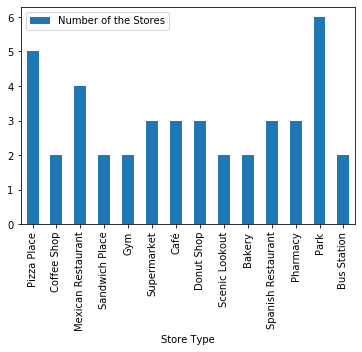

In [81]:
df1.plot(x='Store Type', y='Number of the Stores', kind='bar')

From the figure above we can see that this neighborhood has several restuarants, and Pizza palces are the main type.


### Queens

In [82]:
neighborhood_latitude2=q.loc[0, 'Latitude']
neighborhood_longitude2=q.loc[0,'Longitude']
neighborhood_name2 =q.loc[0, 'Neighborhood']
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name2, 
                                                               neighborhood_latitude2, 
                                                               neighborhood_longitude2))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


In [85]:
radius =1000
LIMIT =100
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude2, 
    neighborhood_longitude2, 
    radius, 
    LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?&client_id=32ZO5WWBYFCG3GBPVF0CBCG5P2ILDUJ1BNFOSILFGX51W2KU&client_secret=DLI1WNKOGLEXRKXY322Z4GPSQIVKFUMD2EH3DPLNYUJIH4XX&v=20200721&ll=40.76850859335492,-73.91565374304234&radius=1000&limit=100'

In [88]:
results1 =requests.get(url1).json()

In [89]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [92]:
venues2 = results1['response']['groups'][0]['items']
nearby_venues2 = json_normalize(venues2)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]
#filter the category for each row 
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)
#clean the columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [127]:
nearby_venues2.head()

,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
2,CrossFit Queens,Gym,40.769404,-73.918977
3,Simply Fit Astoria,Gym,40.769114,-73.912403
4,Al-sham Sweets and Pastries,Middle Eastern Restaurant,40.768077,-73.911561


In [94]:
#details of the data 
q1 =nearby_venues2.categories

In [95]:
q2=Counter(q1)
q3=dict(q2)
q3

{'Brazilian Restaurant': 1,
 'Gourmet Shop': 2,
 'Gym': 2,
 'Middle Eastern Restaurant': 4,
 'Seafood Restaurant': 3,
 'Martial Arts Dojo': 1,
 'Dessert Shop': 2,
 'Pub': 2,
 'Ice Cream Shop': 2,
 'Falafel Restaurant': 1,
 'Bakery': 3,
 'Bagel Shop': 2,
 'Indian Restaurant': 2,
 'Restaurant': 1,
 'Health & Beauty Service': 1,
 'Mexican Restaurant': 1,
 'Salad Place': 1,
 'Vegetarian / Vegan Restaurant': 1,
 'Bar': 9,
 'Pizza Place': 5,
 'American Restaurant': 1,
 'Grocery Store': 4,
 'Food & Drink Shop': 1,
 'Japanese Restaurant': 1,
 'Greek Restaurant': 7,
 'Cocktail Bar': 1,
 'Beer Garden': 1,
 'Thai Restaurant': 2,
 'Donut Shop': 1,
 'Bubble Tea Shop': 1,
 'Poke Place': 1,
 'Mediterranean Restaurant': 2,
 'Italian Restaurant': 3,
 'Food Truck': 1,
 'Food': 1,
 'Coffee Shop': 4,
 'Sandwich Place': 2,
 'Cajun / Creole Restaurant': 1,
 'Korean Restaurant': 1,
 'Souvlaki Shop': 1,
 'BBQ Joint': 1,
 'Gym / Fitness Center': 1,
 'Record Shop': 1,
 'Comfort Food Restaurant': 1,
 'Brewery': 

In [96]:
dfq=pd.DataFrame(q3.items(), columns=['Store Type', 'Number of the Stores'])
dfq.head(5)

,Store Type,Number of the Stores
0,Brazilian Restaurant,1
1,Gourmet Shop,2
2,Gym,2
3,Middle Eastern Restaurant,4
4,Seafood Restaurant,3


In [97]:
dfq1=dfq[dfq['Number of the Stores']!=1]
dfq1

,Store Type,Number of the Stores
1,Gourmet Shop,2
2,Gym,2
3,Middle Eastern Restaurant,4
4,Seafood Restaurant,3
6,Dessert Shop,2
7,Pub,2
8,Ice Cream Shop,2
10,Bakery,3
11,Bagel Shop,2
12,Indian Restaurant,2


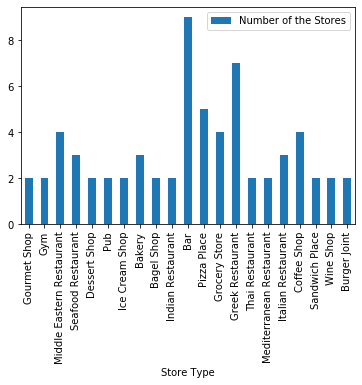

In [98]:
dfq1.plot(x='Store Type', y='Number of the Stores', kind='bar')

In [99]:
dfq2=dfq1[dfq1['Number of the Stores']!=2]
dfq2

,Store Type,Number of the Stores
3,Middle Eastern Restaurant,4
4,Seafood Restaurant,3
10,Bakery,3
18,Bar,9
19,Pizza Place,5
21,Grocery Store,4
24,Greek Restaurant,7
32,Italian Restaurant,3
35,Coffee Shop,4


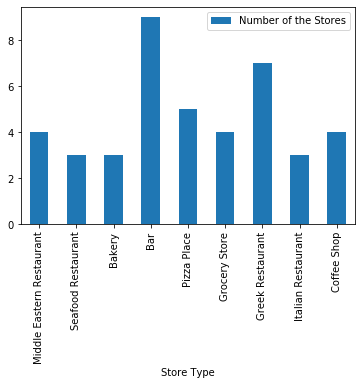

In [100]:
dfq2.plot(x='Store Type', y='Number of the Stores', kind='bar')

From the figure above, we can see that Queens is slightly a better place than Manhattan. It has more bars and the same number of pizza stores. 

Thus, Manhattan is not the best palce to open the pizza place based on the requirements from my client